<a href="https://colab.research.google.com/github/Latthaphon2545/ANN/blob/main/ANN_T02Generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generalization

> ``It ain't what you don't know that gets you into trouble.

> It's what you know for sure that just ain't so.''

> ---Mark Twain

In [9]:
import numpy as np
from matplotlib import pyplot as plt

Polynomial function:

$$\hat{y} = f(x, w) =  \sum_{m=0}^D w_m \cdot x^m$$

Data

In [8]:
DX = [0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1]
DY = [-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004]

Polynomial model

In [10]:
def fmodel(x, w):
    m = len(w)
    y = 0
    for i in range(m):
        y += w[i] * x**i

    return y

Training facilities

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pwd

/content


In [2]:
!ls ./drive/MyDrive/Y2023/IML/HandsOn/CurveFitting

ls: cannot access './drive/MyDrive/Y2023/IML/HandsOn/CurveFitting': No such file or directory


In [3]:
import sys
sys.path.append("./drive/MyDrive/Y2023/IML/HandsOn/CurveFitting") # my path
## Have it point to your path!

In [6]:
from shortcutpoly2 import super_train_poly as sctrain

Prep data

In [12]:
DatXY = np.array([DX, DY])

In [13]:
DatXY.shape

(2, 10)

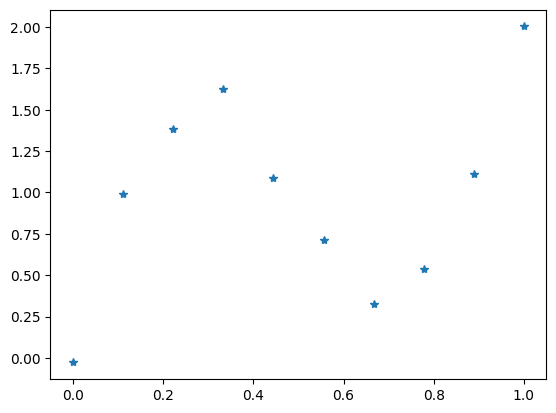

In [14]:
plt.plot(DX, DY, '*')

Train

In [15]:
# Choose the degree
# short_train_poly  does not need initial values. But, it only needs to know len(w) to determine the degree.
#w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # polynomial degree
w0 = [0, 0, 0, 0, 0] # polynomial degree


w =sctrain(w0, DatXY[0,:], DatXY[1,:])
print(w)

[ -0.07150842  14.17990899 -39.23723974  31.97464856  -4.78975712]


Let's see the trained model on data

In [16]:
# Check training error

D, N = DatXY.shape

ys = [fmodel(DatXY[0,i], w) for i in range(N)]

Training_error = np.sum(np.square(ys - DatXY[1,:]))

print('Training error = ', Training_error)

Training error =  0.09442147406390809


Let's check the plot

[-0.07150842265656507, 1.0620218465049585, 1.4808655134606643, 1.4212234229707985, 1.1018455672710754, 0.7209344918612858, 0.4704439980839651, 0.5131823610256963, 0.997938947936456, 2.056052273541673]
[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]


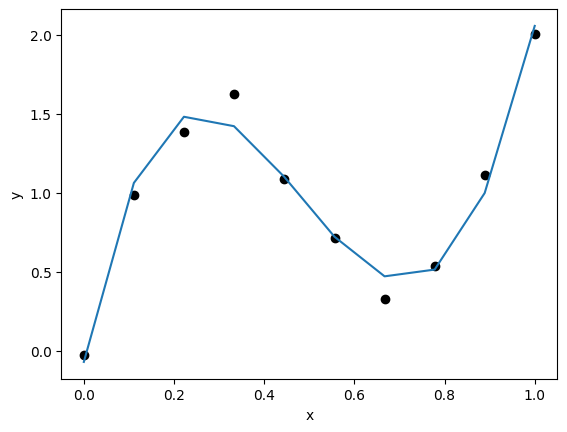

In [17]:
# Now, let's see how it does.

D, N = DatXY.shape

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
xs = [DatXY[0,i] for i in range(N)]
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
print(ys)
print(xs)
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Illustrative Example

Training error =  3.467603278195304e-07
[-0.028003400901252463, 0.9880290366148864, 1.3868899368202852, 1.625242969526917, 1.0886566837856435, 0.7133257339696115, 0.3277922299605507, 0.5350848931620931, 1.1119797745013784, 2.004002142683021]
[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]


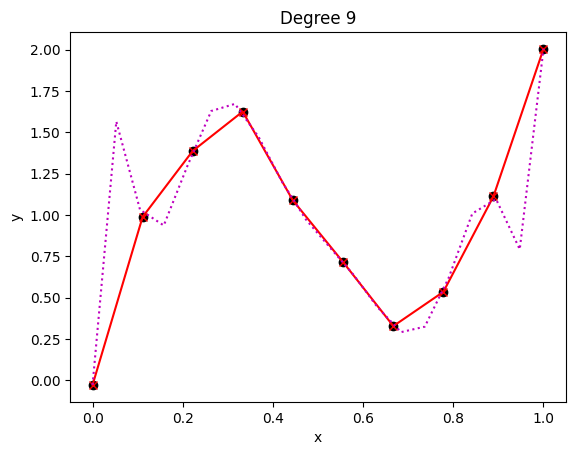

In [20]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Pick the degree ~ hyperparameter เลือกให้จรงตามจำนวน degree เช่น มี x^0 -> x^10 ให้เอา 10 degree

#w0 = [0, 0]  # Pick the degree ~ hyperparameter

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
xs = [DatXY[0,i] for i in range(N)]
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
print(ys)
print(xs)
plt.plot(xs, ys, 'rx-')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Degree " + str(len(w)-1))

# สมมุติว่ามันมีไม่ตรงกำจำนวน degree มันตามจุด แต่มันไม่ดี -> จารย์บอกมันไม่ทรงพลัง 5555555
# Overfitting -> Bad
# good predict for any data, including what they have not seen before
xs = np.linspace(0, 1, 20)
ys = [fmodel(x,w) for x in xs]
plt.plot(xs, ys, "m:")

plt.show()


Is it that perfect?

PAUSE ... PAUSE ... PAUSE


#Reveal



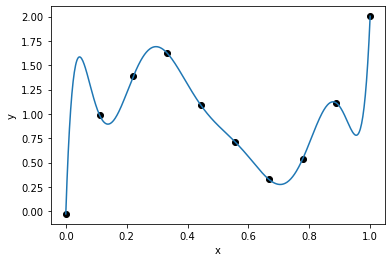

w = 
[-2.80034009e-02  9.30588292e+01 -1.86566353e+03  1.61716958e+04
 -7.39390367e+04  1.96484488e+05 -3.14733706e+05  2.99644950e+05
 -1.56099362e+05  3.42456080e+04]


In [ ]:
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('w = ')
print(w)

The model fits training data perfectly.

But, it does not capture the underlying behavior of the relation.

This is called "**overfitting**".
The model loses **generalization**.
It fits too well to the training data
and it might not be able to predict well in general (i.e., data it has not seen).

> **Overfitting** is characterized by having small training error, but unproportionally large test error.

The best way to spot overfitting is to use **test dataset**---another dataset not used in training.

See [Model evaluation](#-Model-evaluation-/-model-selection).


#Model evaluation

Since we cannot rely on training data to evaluate our model.

We need **another set** of data to check model sanity.

We need a **Test Set**.

##Separating Data

In [ ]:
# To better illustrate this, we will have more data

def gen_data(x):
        N = len(x)
        xp = x*10
        y = np.sin(xp) + 0.2*xp + 0.2*np.random.randn(N)

        return y

In [ ]:
xs = np.linspace(0, 1, num=500)
ys = gen_data(xs)

In [ ]:
# Save the data (Just in case)
DataX = xs.copy()
DataY = ys.copy()

Text(0, 0.5, 'y')

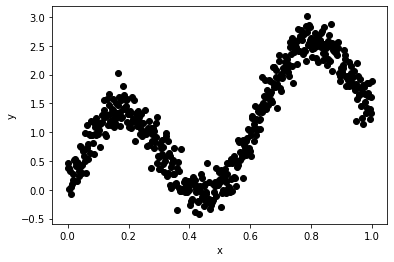

In [ ]:
plt.plot(xs, ys, 'ko')
plt.xlabel('x'); plt.ylabel('y')

In [ ]:
N = len(xs)
print('N = ', N)

N =  500


In [ ]:
Ntrain = int(0.7 * N)
print('Ntrain = ', Ntrain)

Ntrain =  350


### Use IDs to separate

In [ ]:
sids = np.random.permutation(np.arange(N))
trainIDs = sids[:Ntrain]
testIDs = sids[Ntrain:]

It's the id that is the key to this randomized separation.

In [ ]:
print('train ids = ', trainIDs)
print('test ids = ', testIDs)

train ids =  [243  43  86 295 430  22  88 176 467 239 341 165 146  55 364 223 197 456
 328 486  10  71 225  57 458 386 201 305 185 129 337 218 399 489 274  69
 462 394  53 362 465  45 451 396 482 320 344 366 142 132 352 377  77   8
 285 275 258 432 181 436 236 380 402  82 206  36 282  93 416 252  52 238
 226 321 276 499 189  73 125 104 158 220 139 155 471 257 294  12   5  58
 359 419  37 263 384   7 420 475 169 423 207  99 251 284 298 383  34 230
 354 145 472 162  98 488 187 133 135 447 367 415 154 213  92 491   0 200
 117  35  64  11 373 245 228 302  79  96 123  95 143 109  84 369 315 473
 492  50 203  20 371  97 249 105 222 393 297 332 445 408 316 209 140 173
 476 121 108 414 421 360 307 498 235 390 356 459 350 313  74 392 327 116
 210 395 303 247 231 198  94 483 216 474  39 261   9 479 480 246  18 308
 338 469 174 496 234 114 241 152 144 208 376  48 434 345 319 317 224  16
 495 301 339 229 157 485  42 398 329 388 309  70 202 159  17 493   3 468
 233 411 481 227 340 120 461 184 457  

*We* can check (for this case).

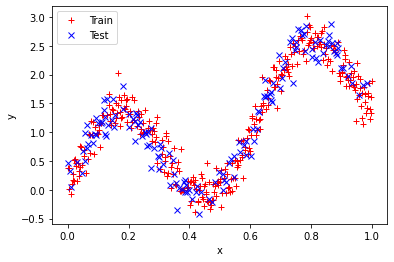

In [ ]:
plt.plot(xs[trainIDs], ys[trainIDs], 'r+')
plt.plot(xs[testIDs], ys[testIDs], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

### Wrong way to separate data (I)

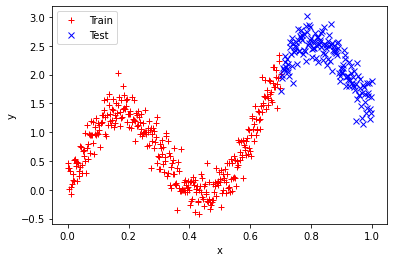

In [ ]:
plt.plot(xs[:Ntrain], ys[:Ntrain], 'r+')
plt.plot(xs[Ntrain:], ys[Ntrain:], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

### Wrong way (II)

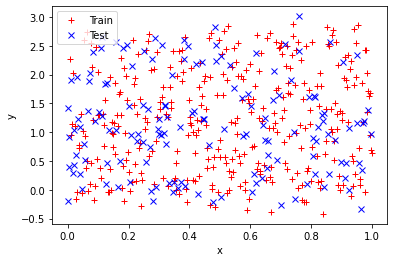

In [ ]:
np.random.shuffle(xs)
np.random.shuffle(ys)

plt.plot(xs[:Ntrain], ys[:Ntrain], 'r+')
plt.plot(xs[Ntrain:], ys[Ntrain:], 'bx')
plt.xlabel('x'); plt.ylabel('y')

plt.legend(["Train", "Test"])

Let's take a look back at our data

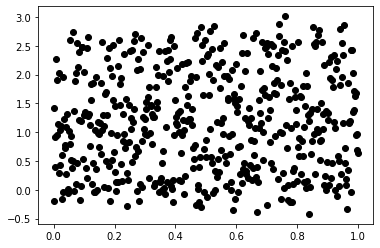

In [ ]:
plt.plot(xs, ys, 'ko')

Ah!!!! They are all mixed up!!!


We're screwed!!

Hey! we have a copy, remember?

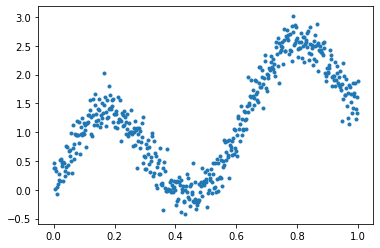

In [ ]:
plt.plot(DataX, DataY, ".")

### Use a standard module to separate data


check out [sklearn split data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(DataX.shape)
print(DataY.shape)

(500,)
(500,)


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(xs.reshape((-1,1)), ys.reshape((-1,1)), test_size=0.25, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350,)
(350,)
(150,)
(150,)


Text(0, 0.5, 'y')

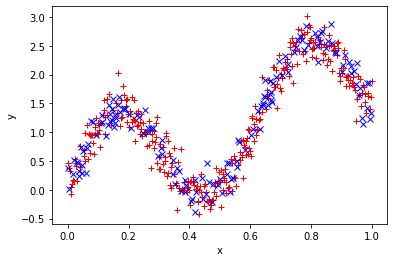

In [ ]:
plt.plot(x_train, y_train, 'r+')
plt.plot(x_test, y_test, 'bx')
plt.xlabel('x'); plt.ylabel('y')

#Model selection

In [ ]:
# Small set
smallx = np.random.uniform(low=0.0, high=1.0, size=20)
smally = gen_data(smallx)


x_train, x_test, y_train, y_test = train_test_split(smallx, smally, test_size=0.30, random_state=42)

# Large set
#x_train, x_test, y_train, y_test = train_test_split(DataX, DataY, test_size=0.30, random_state=42)



In [ ]:
# Prepare training data
trainXY = np.c_[x_train, y_train].T
trainXY.shape

(2, 14)

In [ ]:
# Prepara test data
testXY = np.c_[x_test, y_test].T
testXY.shape

(2, 6)

In [ ]:
Ms = [1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 18, 19]

train_errs = []
test_errs = []

ws = []

for M in Ms:

  print('Degree ', M)
  w0 = np.random.normal(0, 1, M).T.tolist()

  # Train
  w =sctrain(w0, trainXY[0,:], trainXY[1,:])

  ws.append(w)

  # "Test" (sort of)
  D, N = trainXY.shape
  ys = np.array([fmodel(trainXY[0,i], w) for i in range(N)])
  Training_error = np.sum(np.square(ys - trainXY[1,:]))
  print('* Training error = ', Training_error)
  train_errs.append(Training_error)

  ## Test error
  D, N = testXY.shape
  ys = np.array([fmodel(testXY[0,i], w) for i in range(N)])
  Test_error = np.sum(np.square(ys - testXY[1,:]))
  print('* Test error = ', Test_error)
  test_errs.append(Test_error)

Degree  1
* Training error =  7.502709585093429
* Test error =  6.06899530085562
Degree  2
* Training error =  3.902131371250251
* Test error =  2.923561432089979
Degree  3
* Training error =  1.1755553525484321
* Test error =  1.064523504108737
Degree  4
* Training error =  1.0396189360688404
* Test error =  0.9193009207596456
Degree  5
* Training error =  0.3986541047146279
* Test error =  0.1785704266277708
Degree  6
* Training error =  0.3932973964850849
* Test error =  0.20094179979512003
Degree  7
* Training error =  0.3119633420489649
* Test error =  0.29124987205354064
Degree  10
* Training error =  0.24260132585426283
* Test error =  0.1536313174621435
Degree  13
* Training error =  2.458893679207135
* Test error =  412.303567982673
Degree  15
* Training error =  0.15119887087012743
* Test error =  0.9880698087106298
Degree  18
* Training error =  0.32520883167560727
* Test error =  2547.1778257911888
Degree  19
* Training error =  0.39966855918337335
* Test error =  4034.1954

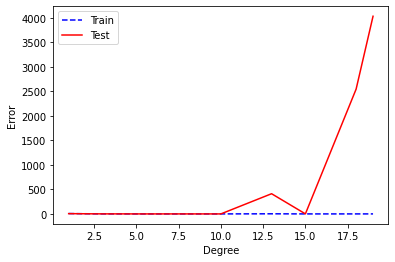

In [ ]:
plt.plot(Ms, train_errs, 'b--')
plt.plot(Ms, test_errs, 'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])

In [ ]:
print("ID:          ", ("\t{};"*len(Ms)).format(*range(len(Ms))))
print("Complexity M:", ("\t{};"*len(Ms)).format(*Ms))
print("Train error: ", ("\t{:0.2f};"*len(train_errs)).format(*train_errs))
print("Test error:  ", ("\t{:0.2f};"*len(test_errs)).format(*test_errs))


ID:           	0;	1;	2;	3;	4;	5;	6;	7;	8;	9;	10;	11;
Complexity M: 	1;	2;	3;	4;	5;	6;	7;	10;	13;	15;	18;	19;
Train error:  	7.50;	3.90;	1.18;	1.04;	0.40;	0.39;	0.31;	0.24;	2.46;	0.15;	0.33;	0.40;
Test error:   	6.07;	2.92;	1.06;	0.92;	0.18;	0.20;	0.29;	0.15;	412.30;	0.99;	2547.18;	4034.20;


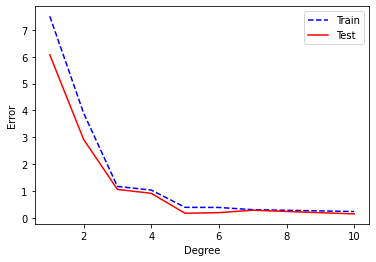

In [ ]:
plt.plot(Ms[:-4], train_errs[:-4], 'b--')
plt.plot(Ms[:-4], test_errs[:-4], 'r')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])

To select a model, use test error as a guide.


We usually call test data using for selecting a model "**validation dataset**".

Then, we use another set, "test dataset" to do the final evaluation.

In [ ]:
 chosenID = 4

 N = 50
 xs = np.linspace(0, 1, num=N)
 ys = np.array([fmodel(xs[i], ws[chosenID]) for i in range(N)])

(-3.0, 4.0)

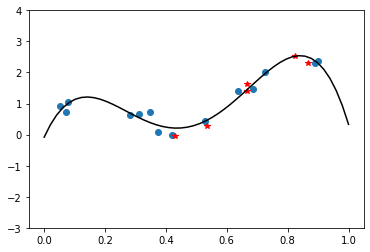

In [ ]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'r*')
plt.plot(xs, ys, 'k-')

plt.ylim([-3, 4])

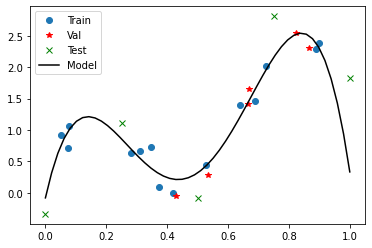

In [ ]:
# Once we choose a mode, we should do a final evaluation.
# For convenience, we generate another set of data, i.e., the test set

testevalx = np.linspace(0, 1, num=5)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])

plt.plot(trainXY[0,:], trainXY[1,:], 'o') ## Train
plt.plot(testXY[0,:], testXY[1,:], 'r*') ## Validation
plt.plot(TestDatXY[0,:], TestDatXY[1,:], 'gx') ## Test

plt.plot(xs, ys, 'k-')
plt.legend(['Train', 'Val', 'Test', 'Model'])

In [ ]:
D, N = TestDatXY.shape
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
test_error = np.sum(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: test error = ', test_error)


Final evaluation: test error =  2.9843472232276547


#MSE vs SSE

In [ ]:
N = 500

testevalx = np.linspace(0, 1, num=N)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
test_error = np.sum(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: test error = ', test_error)

Final evaluation: test error =  49.32051765675672


In practice, it is more convenient to use MSE, rather than SSE.

In [ ]:
N = 500

testevalx = np.linspace(0, 1, num=N)
testevaly = gen_data(testevalx)

TestDatXY = np.array([testevalx, testevaly])
yp = np.array([fmodel(TestDatXY[0,i], ws[chosenID]) for i in range(N)])
mse = np.mean(np.square(yp - TestDatXY[1,:]))
print('Final evaluation: mse = ', mse)

# MSE is less sensitive to a number of datapoints.

Final evaluation: mse =  0.09581368709411896


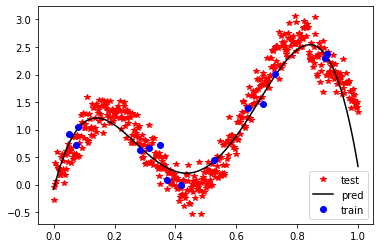

In [ ]:
plt.plot(testevalx, testevaly, 'r*')
plt.plot(testevalx, yp, 'k-')
plt.plot(x_train, y_train, 'bo')
plt.legend(['test', 'pred', 'train'], loc='lower right')

Life is as good as it gets.

---

**The End.**

#Countermeasure to overfitting



*   Use a less complex model, e.g., lower degree
*   Have more data
*   Regularization   


##Use less complexity

Training error =  0.1031952902205021


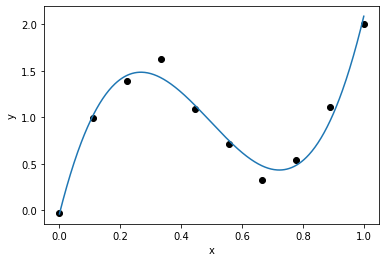

In [ ]:
w0 = [0, 0, 0, 0]

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500; xs = np.linspace(0, 1, num=N); ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys); plt.xlabel('x'); plt.ylabel('y'); plt.show()

##Use more data

In general, acquisition of data is costly.

For illustration, let's generate data:

$$y = sin(x) + x + \epsilon$$

In [ ]:
xs = np.linspace(0, 1, num=80)
ys = gen_data(xs)

DatXY = np.array([xs, ys])

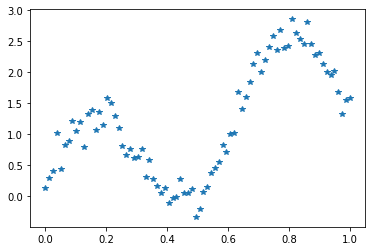

In [ ]:
plt.plot(DatXY[0,:], DatXY[1,:], '*')

Training error =  2.299170231094237


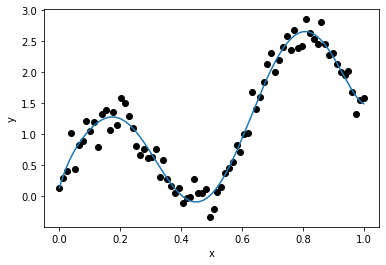

In [ ]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Train
w =sctrain(w0, DatXY[0,:], DatXY[1,:])

# "Test" (sort of)
D, N = DatXY.shape
ys = [fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Do regularization

There are many **regularization** techniques.
But, here, we will see "**weight decay**".

loss:

$$E = \frac{1}{2}\sum_n (\hat{y} - y)^2 + \frac{\lambda}{2} \sum_m w_m^2$$

where $\lambda \geq 0$.

Lambda is called "**Lagrange parameter**".

In [ ]:
def shortcut_train_polyW8DK(w, DataXY, lm=1):
    '''
    Y [1 x N] = w [1 x M] * Phi [M x N]

    Grad [M x 1] = Phi [M x N] * (Y' [N x 1] - T' [N x 1]) + lambda * w'
    Therefore,
        Grad    = Phi [M x N] * (Phi'*w' - T' [N x 1]) + lambda * w'
                = Phi*Phi'*w' - Phi*T' + lambda * w'.
    Thus, at Grad = 0, w' = Phi*T' * inv(Phi*Phi')
    '''
    assert DataXY.shape[0] == 2

    M = len(w)
    d, N = DataXY.shape

    X = DataXY[0,:]
    T = DataXY[1,:]


    # Compose Phi matrix [M x N]
    Phi = np.vstack((np.ones((1, N)),
            np.tile(X, (M-1, 1))
            ))

    Phi = np.cumprod(Phi, axis=0)

    A = np.dot(Phi, Phi.T) + lm * np.diag(np.ones(M))
    b = np.dot(Phi, T.T)

    w = np.linalg.solve(A, b)

    return w

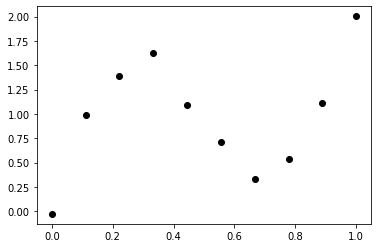

In [ ]:
DX = [0.000, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1]
DY = [-0.028, 0.988, 1.387, 1.625, 1.089, 0.713, 0.328, 0.535, 1.112, 2.004]

DatXY = np.array([DX, DY])
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

In [ ]:
w0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Train
w = shortcut_train_polyW8DK(w0, DatXY, lm=1e-12) # try lm: 0, 1e-13, 1e-12, 1e-6
w

array([-2.70633880e-02,  2.60656362e+01, -3.22663786e+02,  2.31944371e+03,
       -9.08529103e+03,  2.03829481e+04, -2.72695738e+04,  2.16123298e+04,
       -9.37681512e+03,  1.71558703e+03])

Training error =  0.01940764954196061


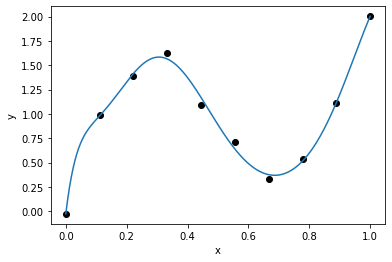

In [ ]:
# "Test" (sort of)
D, N = DatXY.shape
ys = [ fmodel(DatXY[0,i], w) for i in range(N)]
Training_error = np.sum(np.square(ys - DatXY[1,:]))
print('Training error = ', Training_error)

# Plot
N = 500
xs = np.linspace(0, 1, num=N)
ys = [fmodel(xs[i], w) for i in range(N)]

# Plot data
plt.plot(DatXY[0,:], DatXY[1,:], 'ko')

# Plot prediction
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Ending note on evaluation metric

Another metric widely used for regression is R-square.

$$R^2 = 1 - \frac{\sum_n (\hat{y}_n - y_n)^2}{\sum_n (\bar{y} - y_n)^2 }$$

In [ ]:
r2 = 1- np.sum( np.square(yp - TestDatXY[1,:]) )/np.sum( np.square( np.mean(TestDatXY[1,:]) - TestDatXY[1,:]) )
print('r2 =', r2)

r2 = 0.8742065359933777


## Standard R-square

In [ ]:
from sklearn.metrics import r2_score

r2_score(TestDatXY[1,:], yp)

0.8742065359933777